In [1]:
import pandas as pd, json
import io
import requests


In [2]:
d = requests.get('https://fantasyfootballcalculator.com/api/v1/adp/half-ppr?teams=12&year=2020&position=all').json()
df = pd.DataFrame.from_dict(d['players'])
df.head(20)

,adp,adp_formatted,bye,high,low,name,player_id,position,stdev,team,times_drafted
0,1.3,1.01,13,1,3,Christian McCaffrey,2434,RB,0.5,CAR,188
1,2.0,1.02,11,1,3,Saquon Barkley,2860,RB,0.5,NYG,95
2,2.9,1.03,10,1,4,Ezekiel Elliott,2343,RB,0.6,DAL,128
3,4.3,1.04,6,3,7,Alvin Kamara,2439,RB,0.7,NO,139
4,5.1,1.05,6,1,8,Michael Thomas,2357,WR,1.2,NO,116
5,6.1,1.06,7,2,10,Derrick Henry,2350,RB,1.6,TEN,119
6,6.6,1.07,7,3,10,Dalvin Cook,2432,RB,1.4,MIN,204
7,8.7,1.09,5,4,14,Davante Adams,2125,WR,1.8,GB,103
8,9.1,1.09,6,5,13,Josh Jacobs,3255,RB,1.6,LV,116
9,10.5,1.10,8,7,17,DeAndre Hopkins,1975,WR,1.9,ARI,92


In [3]:
#loading Draft Info
#need to figure out

In [4]:
#Top 20 Running Backs
rb_draft_pos = df[df['position'] == 'RB']
rb_draft_pos[['name', 'adp_formatted']].head(20)

,name,adp_formatted
0,Christian McCaffrey,1.01
1,Saquon Barkley,1.02
2,Ezekiel Elliott,1.03
3,Alvin Kamara,1.04
5,Derrick Henry,1.06
6,Dalvin Cook,1.07
8,Josh Jacobs,1.09
11,Joe Mixon,1.11
12,Aaron Jones,2.01
13,Nick Chubb,2.01


In [10]:
#Top 20 Wide Receivers
wr_draft_pos = df[df['position'] == 'WR']
wr_draft_pos[['name', 'adp_formatted']].head(20)

,name,adp_formatted
4,Michael Thomas,1.05
7,Davante Adams,1.09
9,DeAndre Hopkins,1.10
10,Tyreek Hill,1.11
15,Julio Jones,2.03
18,Chris Godwin,2.06
21,Mike Evans,2.10
22,Kenny Golladay,2.11
24,Amari Cooper,3.01
26,Adam Thielen,3.02


In [11]:
#Top 20 Quarterbacks
qb_draft_pos = df[df['position'] == 'QB']
qb_draft_pos[['name', 'adp_formatted']].head(20)

,name,adp_formatted
14,Lamar Jackson,2.02
16,Pat Mahomes,2.04
47,Dak Prescott,4.11
54,Deshaun Watson,5.03
58,Kyler Murray,5.10
59,Russell Wilson,5.11
70,Matt Ryan,6.11
78,Josh Allen,7.06
81,Aaron Rodgers,7.09
90,Carson Wentz,8.06


In [5]:
top_60 = df[df['adp'] <= 60]
rb_60 =top_60[top_60['position'] == 'RB']
rb_60

,adp,adp_formatted,bye,high,low,name,player_id,position,stdev,team,times_drafted
0,1.3,1.01,13,1,3,Christian McCaffrey,2434,RB,0.5,CAR,188
1,2.0,1.02,11,1,3,Saquon Barkley,2860,RB,0.5,NYG,95
2,2.9,1.03,10,1,4,Ezekiel Elliott,2343,RB,0.6,DAL,128
3,4.3,1.04,6,3,7,Alvin Kamara,2439,RB,0.7,NO,139
5,6.1,1.06,7,2,10,Derrick Henry,2350,RB,1.6,TEN,119
6,6.6,1.07,7,3,10,Dalvin Cook,2432,RB,1.4,MIN,204
8,9.1,1.09,6,5,13,Josh Jacobs,3255,RB,1.6,LV,116
11,11.1,1.11,9,5,16,Joe Mixon,2438,RB,2.1,CIN,188
12,13.0,2.01,5,8,18,Aaron Jones,2507,RB,1.9,GB,103
13,13.1,2.01,9,5,21,Nick Chubb,2863,RB,2.8,CLE,177


In [6]:
df2= df.drop(columns=['player_id', 'stdev', 'times_drafted'])
df2.head()

,adp,adp_formatted,bye,high,low,name,position,team
0,1.3,1.01,13,1,3,Christian McCaffrey,RB,CAR
1,2.0,1.02,11,1,3,Saquon Barkley,RB,NYG
2,2.9,1.03,10,1,4,Ezekiel Elliott,RB,DAL
3,4.3,1.04,6,3,7,Alvin Kamara,RB,NO
4,5.1,1.05,6,1,8,Michael Thomas,WR,NO


In [7]:
#add bins for draft position
rounds = [1,2,3,4,5,6,7,8,9,10,11,12,13]
df3 = df2[df2['adp'] <= 156]
df3['round'] =pd.qcut(df3['adp'], q=13, labels = rounds)
df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,adp,adp_formatted,bye,high,low,name,position,team,round
0,1.3,1.01,13,1,3,Christian McCaffrey,RB,CAR,1
1,2.0,1.02,11,1,3,Saquon Barkley,RB,NYG,1
2,2.9,1.03,10,1,4,Ezekiel Elliott,RB,DAL,1
3,4.3,1.04,6,3,7,Alvin Kamara,RB,NO,1
4,5.1,1.05,6,1,8,Michael Thomas,WR,NO,1


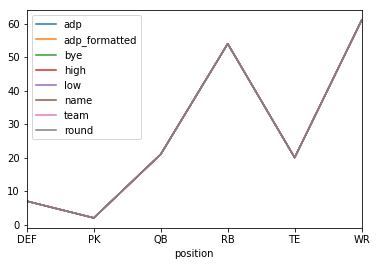

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
chart = df3.groupby('position').count().plot()
plt.show()



In [9]:
ax = sns.countplot(x="position", hue="round", data=round_count)

ValueError: Could not interpret input 'position'

In [ ]:
breakdown = df3.groupby(['team', 'position', 'name'])
print(breakdown['team'])


In [ ]:
value_rb = df3[[(df3['position'] == 'RB']) & (df3[df3['round'] > 4])]